In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
df= pd.read_csv("D:/College/BE/Outputs/DMV/DMV 11/customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [10]:
df['Sales_Amount'] = df['price'] * df['quantity']

In [11]:
region_sales = df.groupby('shopping_mall')['Sales_Amount'].sum().reset_index()
region_sales = region_sales.sort_values(by='Sales_Amount', ascending=False)
print(region_sales)

       shopping_mall  Sales_Amount
5   Mall of Istanbul   50872481.68
4             Kanyon   50554231.10
6          Metrocity   37302787.33
7       Metropol AVM   25379913.19
3       Istinye Park   24618827.68
9       Zorlu Center   12901053.82
0        Cevahir AVM   12645138.20
8     Viaport Outlet   12521339.72
1  Emaar Square Mall   12406100.29
2     Forum Istanbul   12303921.24


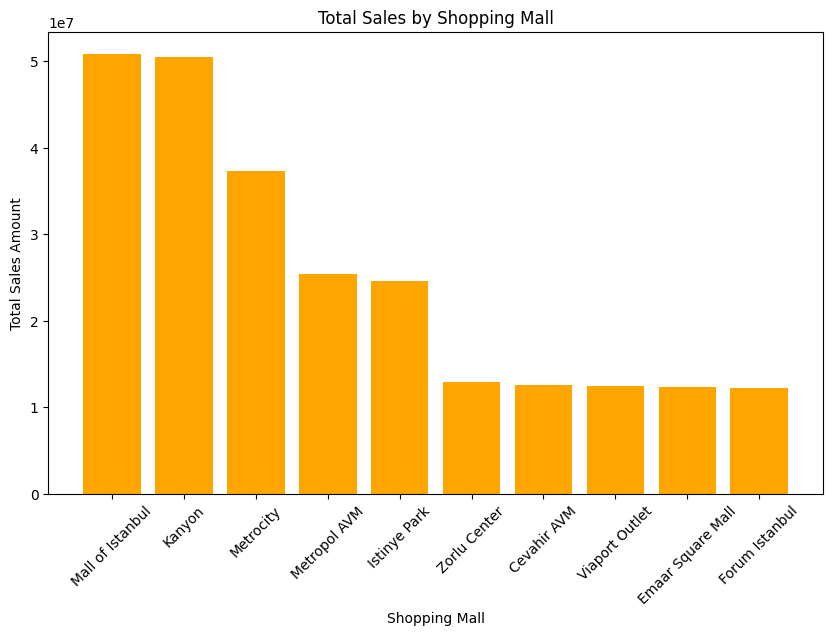

In [12]:
plt.figure(figsize=(10,6))
plt.bar(region_sales['shopping_mall'], region_sales['Sales_Amount'], color='orange')
plt.title("Total Sales by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()


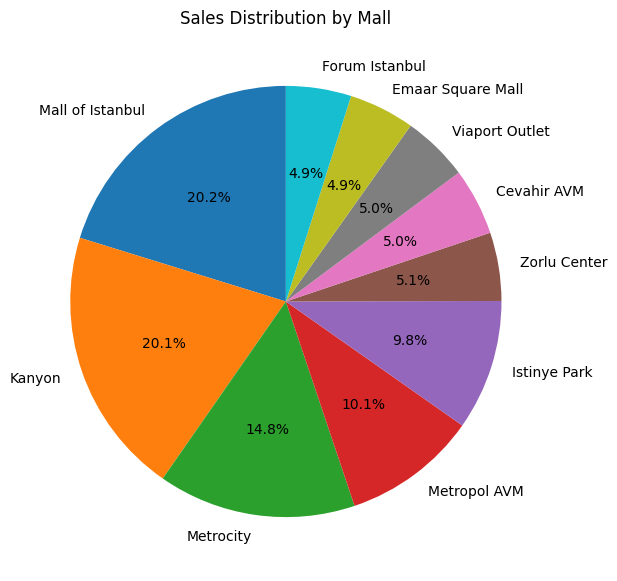

In [13]:
plt.figure(figsize=(7,7))
plt.pie(region_sales['Sales_Amount'], labels=region_sales['shopping_mall'], autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Mall")
plt.show()

In [14]:
top_malls = region_sales.head(3)
print("Top Performing Malls:")
print(top_malls)

Top Performing Malls:
      shopping_mall  Sales_Amount
5  Mall of Istanbul   50872481.68
4            Kanyon   50554231.10
6         Metrocity   37302787.33


In [17]:
region_category_sales = df.groupby(['shopping_mall', 'category'])['Sales_Amount'].sum().unstack()
print(region_category_sales)

category               Books     Clothing   Cosmetics  Food & Beverage  \
shopping_mall                                                            
Cevahir AVM         44541.00   5706321.28   321214.00         44010.45   
Emaar Square Mall   41995.80   5590490.40   338941.76         40610.95   
Forum Istanbul      42056.40   5792444.24   353172.76         39162.24   
Istinye Park        76083.30  11253900.24   655357.88         85918.44   
Kanyon             163029.15  22609527.60  1369550.78        166497.05   
Mall of Istanbul   172240.35  22947417.68  1367517.78        171177.90   
Metrocity          125911.65  17226692.56   991860.04        129902.74   
Metropol AVM        83718.90  11568084.00   680770.38         88638.04   
Viaport Outlet      39632.40   5604594.16   347439.70         41662.18   
Zorlu Center        45343.95   5697318.88   367037.82         41955.06   

category                 Shoes   Souvenir  Technology       Toys  
shopping_mall                               

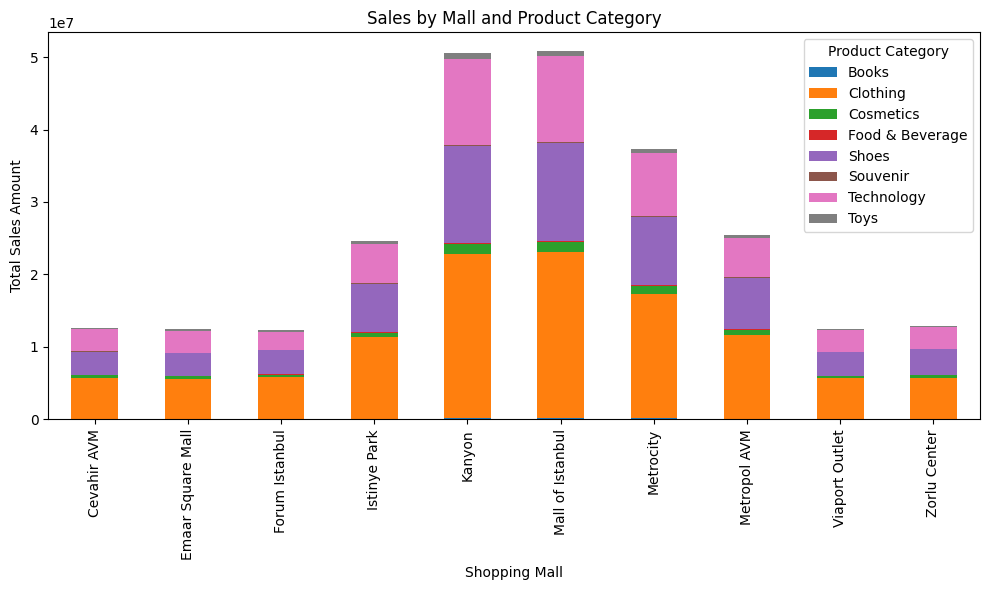

In [18]:
region_category_sales.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Sales by Mall and Product Category")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product Category")
plt.tight_layout()
plt.show()